In [3]:
import pypowsybl as pp

In [4]:
n6 = pp.network.create_metrix_tutorial_six_buses_network()

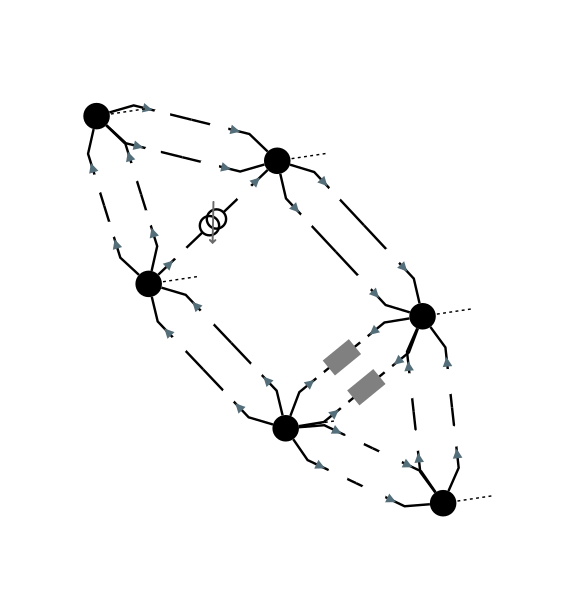

In [7]:
n6.get_network_area_diagram()

In [8]:
n6.get_single_line_diagram ('SO')

In [9]:
n6.get_single_line_diagram ('N')

In [10]:
n6.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,rated_s,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,,
SO_G1,,THERMAL,480.0,0.0,2000.0,NaN,NaN,NaN,CURVE,406.450043,2.35231,True,SO_G1,-480.0,NaN,NaN,SO_poste,SO_poste_0,True
SO_G2,,THERMAL,480.0,0.0,2000.0,NaN,NaN,NaN,CURVE,406.450043,2.35231,True,SO_G2,-480.0,NaN,NaN,SO_poste,SO_poste_0,True
SE_G,,THERMAL,100.0,0.0,600.0,NaN,NaN,NaN,CURVE,406.450043,6.45498,True,SE_G,-0.0,NaN,NaN,SE_poste,SE_poste_0,True
N_G,,THERMAL,0.0,0.0,600.0,NaN,NaN,NaN,CURVE,406.450043,7.48158,True,N_G,-0.0,NaN,NaN,N_poste,N_poste_0,True


In [11]:
n6.get_loads()

,name,type,p0,q0,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,
SO_L,,UNDEFINED,480.0,4.8,480.0,NaN,NaN,SO_poste,SO_poste_0,True
SE_L1,,UNDEFINED,480.0,4.8,480.0,NaN,NaN,SE_poste,SE_poste_0,True
SE_L2,,UNDEFINED,0.0,4.8,0.0,NaN,NaN,SE_poste,SE_poste_0,True


#### Production and Demand

In [14]:
n6.update_generators(id='SO_G2', target_p=960)
n6.update_generators(id='SO_G1', target_p=0)
n6.update_generators(id='SE_G', target_p=0)

In [15]:
n6.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,rated_s,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,,
SO_G1,,THERMAL,0.0,0.0,2000.0,NaN,NaN,NaN,CURVE,406.450043,2.35231,True,SO_G1,-480.0,NaN,NaN,SO_poste,SO_poste_0,True
SO_G2,,THERMAL,960.0,0.0,2000.0,NaN,NaN,NaN,CURVE,406.450043,2.35231,True,SO_G2,-480.0,NaN,NaN,SO_poste,SO_poste_0,True
SE_G,,THERMAL,0.0,0.0,600.0,NaN,NaN,NaN,CURVE,406.450043,6.45498,True,SE_G,-0.0,NaN,NaN,SE_poste,SE_poste_0,True
N_G,,THERMAL,0.0,0.0,600.0,NaN,NaN,NaN,CURVE,406.450043,7.48158,True,N_G,-0.0,NaN,NaN,N_poste,N_poste_0,True


In [17]:
n6.update_loads(id='SE_L1', p0=960)
n6.update_loads(id='SO_L', p0=0)
n6.update_loads(id='SE_L2', p0=0)

In [18]:
n6.get_loads()

,name,type,p0,q0,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,
SO_L,,UNDEFINED,0.0,4.8,480.0,NaN,NaN,SO_poste,SO_poste_0,True
SE_L1,,UNDEFINED,960.0,4.8,480.0,NaN,NaN,SE_poste,SE_poste_0,True
SE_L2,,UNDEFINED,0.0,4.8,0.0,NaN,NaN,SE_poste,SE_poste_0,True


#### Power Flow Calculation

In [20]:
results = pp.loadflow.run_dc(n6)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, status_text=Converged, iteration_count=0, reference_bus_id='NE_poste_0', slack_bus_results=[SlackBusResult(id='NE_poste_0', active_power_mismatch=-0.0)], distributed_active_power=-0.0)]

In [21]:
n6.get_lines()

,name,r,x,g1,b1,g2,b2,p1,q1,i1,p2,q2,i2,voltage_level1_id,voltage_level2_id,bus1_id,bus2_id,connected1,connected2
id,,,,,,,,,,,,,,,,,,,
NO_N_1,,1.0,1.0,0.0,0.0,0.0,0.0,101.040745,NaN,NaN,-101.040745,NaN,NaN,NO_poste,N_poste,NO_poste_0,N_poste_0,True,True
NO_N_2,,2.0,1.0,0.0,0.0,0.0,0.0,101.040745,NaN,NaN,-101.040745,NaN,NaN,NO_poste,N_poste,NO_poste_0,N_poste_0,True,True
S_SE_1,,3.0,1.0,0.0,0.0,0.0,0.0,290.520372,NaN,NaN,-290.520372,NaN,NaN,S_poste,SE_poste,S_poste_0,SE_poste_0,True,True
S_SE_2,,4.0,1.0,0.0,0.0,0.0,0.0,290.520372,NaN,NaN,-290.520372,NaN,NaN,S_poste,SE_poste,S_poste_0,SE_poste_0,True,True
S_SO_1,,5.0,1.0,0.0,0.0,0.0,0.0,-290.520372,NaN,NaN,290.520372,NaN,NaN,S_poste,SO_poste,S_poste_0,SO_poste_0,True,True
S_SO_2,,6.0,1.0,0.0,0.0,0.0,0.0,-290.520372,NaN,NaN,290.520372,NaN,NaN,S_poste,SO_poste,S_poste_0,SO_poste_0,True,True
SO_NO_1,,7.0,1.0,0.0,0.0,0.0,0.0,189.479628,NaN,NaN,-189.479628,NaN,NaN,SO_poste,NO_poste,SO_poste_0,NO_poste_0,True,True
SO_NO_2,,8.0,1.0,0.0,0.0,0.0,0.0,189.479628,NaN,NaN,-189.479628,NaN,NaN,SO_poste,NO_poste,SO_poste_0,NO_poste_0,True,True
NE_N_1,,9.0,1.0,0.0,0.0,0.0,0.0,-101.040745,NaN,NaN,101.040745,NaN,NaN,NE_poste,N_poste,NE_poste_0,N_poste_0,True,True


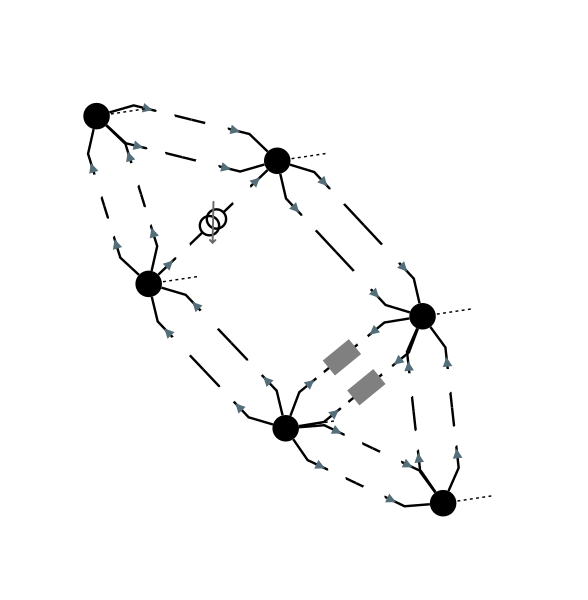

In [22]:
n6.get_network_area_diagram()

#### Simulate a Cable Failure in the Network

In [23]:
n6.disconnect(id='S_SO_1')

True

In [24]:
results = pp.loadflow.run_dc(n6)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, status_text=Converged, iteration_count=0, reference_bus_id='NE_poste_0', slack_bus_results=[SlackBusResult(id='NE_poste_0', active_power_mismatch=-0.0)], distributed_active_power=-0.0)]

In [25]:
n6.get_lines()

,name,r,x,g1,b1,g2,b2,p1,q1,i1,p2,q2,i2,voltage_level1_id,voltage_level2_id,bus1_id,bus2_id,connected1,connected2
id,,,,,,,,,,,,,,,,,,,
NO_N_1,,1.0,1.0,0.0,0.0,0.0,0.0,125.250843,NaN,NaN,-125.250843,NaN,NaN,NO_poste,N_poste,NO_poste_0,N_poste_0,True,True
NO_N_2,,2.0,1.0,0.0,0.0,0.0,0.0,125.250843,NaN,NaN,-125.250843,NaN,NaN,NO_poste,N_poste,NO_poste_0,N_poste_0,True,True
S_SE_1,,3.0,1.0,0.0,0.0,0.0,0.0,242.100337,NaN,NaN,-242.100337,NaN,NaN,S_poste,SE_poste,S_poste_0,SE_poste_0,True,True
S_SE_2,,4.0,1.0,0.0,0.0,0.0,0.0,242.100337,NaN,NaN,-242.100337,NaN,NaN,S_poste,SE_poste,S_poste_0,SE_poste_0,True,True
S_SO_1,,5.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,S_poste,SO_poste,,,False,False
S_SO_2,,6.0,1.0,0.0,0.0,0.0,0.0,-484.200674,NaN,NaN,484.200674,NaN,NaN,S_poste,SO_poste,S_poste_0,SO_poste_0,True,True
SO_NO_1,,7.0,1.0,0.0,0.0,0.0,0.0,237.899663,NaN,NaN,-237.899663,NaN,NaN,SO_poste,NO_poste,SO_poste_0,NO_poste_0,True,True
SO_NO_2,,8.0,1.0,0.0,0.0,0.0,0.0,237.899663,NaN,NaN,-237.899663,NaN,NaN,SO_poste,NO_poste,SO_poste_0,NO_poste_0,True,True
NE_N_1,,9.0,1.0,0.0,0.0,0.0,0.0,-125.250843,NaN,NaN,125.250843,NaN,NaN,NE_poste,N_poste,NE_poste_0,N_poste_0,True,True


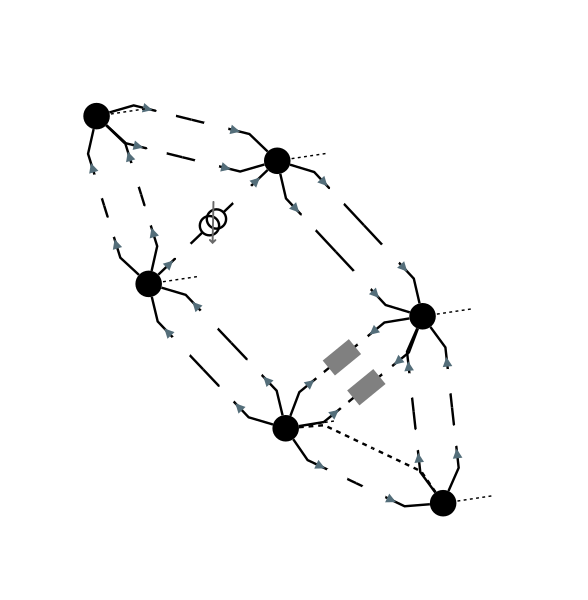

In [26]:
n6.get_network_area_diagram()

The impact of the cable failure led to an increase or over loading of a parallel cable, hence making the grid network insecure. 

In [27]:
n6.connect(id='S_SO_1')

True

In [28]:
n6.update_generators(id='SO_G2', target_p=0)
n6.update_generators(id='SO_G1', target_p=960)
n6.update_generators(id='SE_G', target_p=0)

In [29]:
n6.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,rated_s,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,,
SO_G1,,THERMAL,960.0,0.0,2000.0,NaN,NaN,NaN,CURVE,406.450043,2.35231,True,SO_G1,-0.0,-0.0,NaN,SO_poste,SO_poste_0,True
SO_G2,,THERMAL,0.0,0.0,2000.0,NaN,NaN,NaN,CURVE,406.450043,2.35231,True,SO_G2,-960.0,-0.0,NaN,SO_poste,SO_poste_0,True
SE_G,,THERMAL,0.0,0.0,600.0,NaN,NaN,NaN,CURVE,406.450043,6.45498,True,SE_G,-0.0,-0.0,NaN,SE_poste,SE_poste_0,True
N_G,,THERMAL,0.0,0.0,600.0,NaN,NaN,NaN,CURVE,406.450043,7.48158,True,N_G,-0.0,-0.0,NaN,N_poste,N_poste_0,True


### Security Analysis

In [31]:
security_analysis = pp.security.create_analysis() 
security_analysis.add_single_element_contingency('S_SO_1', 'First Contingency')
security_results = security_analysis.run_dc(n6)

In [32]:
security_results.pre_contingency_result

PreContingencyResult(, status=CONVERGED, limit_violations=[0])

In [34]:
security_results.post_contingency_results

{'First Contingency': PostContingencyResult(contingency_id='First Contingency', status=CONVERGED, limit_violations=[2])}

In [36]:
security_results.limit_violations

subject_name limit_type limit_name       limit  \
contingency_id    subject_id                                                  
First Contingency S_SO_2                     CURRENT        10'  600.000000   
                  S_SO_2                     CURRENT  permanent  500.000061   

                              acceptable_duration  limit_reduction  \
contingency_id    subject_id                                         
First Contingency S_SO_2                        1              1.0   
                  S_SO_2               2147483647              1.0   

                                   value side  
contingency_id    subject_id                   
First Contingency S_SO_2      735.666815  ONE  
                  S_SO_2      735.666815  TWO

In [37]:
n6.get_operational_limits().loc['S_SO_2']

,element_type,side,name,type,value,acceptable_duration
element_id,,,,,,
S_SO_2,LINE,ONE,permanent_limit,CURRENT,5.000001e+02,-1
S_SO_2,LINE,ONE,20',CURRENT,5.500000e+02,1200
S_SO_2,LINE,ONE,10',CURRENT,6.000000e+02,600
S_SO_2,LINE,ONE,1',CURRENT,1.797693e+308,1
S_SO_2,LINE,TWO,permanent_limit,CURRENT,5.000001e+02,-1


#### Sensitivity Analysis

In [43]:
sa = pp.security.create_analysis() 
sa.add_single_element_contingency('S_SO_1')

In [47]:
sa.add_monitored_elements(branch_ids=['S_SO_2', 'S_NO_1', 'S_NO_2', 'S_SO_1'])	

In [48]:
sa_results = sa.run_dc(n6)

In [49]:
sa_results.branch_results

p1  q1          i1  \
contingency_id operator_strategy_id branch_id                               
                                    S_SO_2    -290.520372 NaN  441.400040   
                                    S_SO_1    -290.520372 NaN  441.400040   
S_SO_1                              S_SO_2    -484.200674 NaN  735.666815   

                                                       p2  q2          i2  \
contingency_id operator_strategy_id branch_id                               
                                    S_SO_2     290.520372 NaN  441.400040   
                                    S_SO_1     290.520372 NaN  441.400040   
S_SO_1                              S_SO_2     484.200674 NaN  735.666815   

                                               flow_transfer  
contingency_id operator_strategy_id branch_id                 
                                    S_SO_2               NaN  
                                    S_SO_1               NaN  
S_SO_1                              S_SO_2          0.666667

In [61]:
analysis = pp.sensitivity.create_dc_analysis()
analysis.add_branch_flow_factor_matrix(branches_ids=['S_SO_1', 'S_SO_2'], variables_ids=['SE_G'])
result = analysis.run(n6)

In [62]:
result.get_sensitivity_matrix()

,S_SO_1,S_SO_2
SE_G,0.3,0.3
